В вашем распоряжении имеются две таблицы. Одна таблица – таблица обучения, содержит реальные цифры revenue и downloads, вторая таблица – таблица с модельными данными.

В таблицах колонки:
- Store – зашифрованный стор приложения
- Country – страна приложения
- Store_application_id – зашифрованный айди приложения (чтоб отличать приложение A от приложения B)
- Date – дата, по которой взят срез 
- Downloads – количество инсталлов приложения N в стране M в дату D
- Revenue – ревенью  приложения N в стране M в дату D
- Top_free – какое место занимает приложение N в стране M в дату D, если все приложения упорядочить от приложения с максимальным количеством инсталлов (1 место)  до приложения с минимальным количеством инсталлов (minN место)
- Top_grossing – какое место занимает приложение N в стране M в дату D, если все приложения упорядочить от приложения с максимальным  revenue (1 место)  до приложения с минимальным revenue
- Created_at – время, когда создана конкретная запись


In [104]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv('df_1_test.csv', index_col = 0)
df2 = pd.read_csv('df_2_test.csv', index_col = 0 )

**Вопрос 1.** На Ваш взгляд, какая таблица является обучающей, какая – содержит данные revenue и downloads, полученными от модели? Почему?

**Решение.** Для начала необходимо посмотреть описание данных

In [3]:
df1.head()

,store,country,store_application_id,date,top_free,top_grossing,revenue,downloads,created_at
0,1,AE,1,2018-02-01,7538.0,NaN,NaN,30.0,2018-12-06 19:37:17
1,1,AE,1,2018-02-02,7084.0,NaN,NaN,31.0,2018-12-06 19:41:18
2,1,AE,1,2018-02-03,8427.0,NaN,NaN,25.0,2018-12-06 19:45:01
3,1,AE,1,2018-02-04,7842.0,722.0,11.0,26.0,2018-12-06 19:48:48
4,1,AE,1,2018-02-05,8721.0,439.0,21.0,22.0,2018-12-06 19:52:48


In [4]:
df2.head()

,store,country,store_application_id,date,top_free,top_grossing,revenue,downloads,created_at
0,1,EE,4,2018-07-31,NaN,NaN,NaN,1.0,NaN
1,1,AT,5,2015-04-13,3750.0,NaN,NaN,7.0,NaN
2,1,GH,5,2017-11-05,NaN,NaN,NaN,2.0,NaN
3,1,PA,5,2015-06-26,NaN,NaN,NaN,31.0,NaN
4,1,LV,5,2015-10-03,NaN,NaN,NaN,18.0,NaN


In [5]:
df1.describe()

,store,store_application_id,top_free,top_grossing,revenue,downloads
count,378844.0,378844.000000,368220.000000,268783.000000,231605.000000,364060.000000
mean,1.0,2.987024,8118.986174,4873.573280,46.087199,376.575995
std,0.0,1.439724,10471.039001,9064.930022,221.813011,1004.628541
min,1.0,1.000000,30.000000,13.000000,1.000000,1.000000
25%,1.0,2.000000,2001.000000,671.000000,2.600000,15.000000
50%,1.0,3.000000,4573.000000,1672.000000,7.800000,65.000000
75%,1.0,4.000000,9701.000000,4506.000000,23.400000,269.000000
max,1.0,5.000000,99965.000000,99986.000000,4909.000000,24547.900000


In [6]:
df2.describe()

,store,store_application_id,top_free,top_grossing,revenue,downloads,created_at
count,909695.0,909695.000000,203982.000000,145412.000000,132979.000000,908907.000000,0.0
mean,1.0,2.899205,7936.594028,5162.329711,49.344801,114.257301,NaN
std,0.0,1.411011,10055.324057,9885.508822,214.694167,482.745063,NaN
min,1.0,1.000000,30.000000,25.000000,0.000000,1.000000,NaN
25%,1.0,2.000000,1948.000000,644.000000,2.756093,3.000000,NaN
50%,1.0,3.000000,4554.000000,1548.000000,8.303737,13.000000,NaN
75%,1.0,4.000000,9532.750000,4336.000000,27.345799,53.000000,NaN
max,1.0,5.000000,99965.000000,99986.000000,6852.452505,35422.000000,NaN


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378844 entries, 0 to 378843
Data columns (total 9 columns):
store                   378844 non-null int64
country                 378844 non-null object
store_application_id    378844 non-null int64
date                    378844 non-null object
top_free                368220 non-null float64
top_grossing            268783 non-null float64
revenue                 231605 non-null float64
downloads               364060 non-null float64
created_at              378844 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 28.9+ MB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 909695 entries, 0 to 909694
Data columns (total 9 columns):
store                   909695 non-null int64
country                 903802 non-null object
store_application_id    909695 non-null int64
date                    909695 non-null object
top_free                203982 non-null float64
top_grossing            145412 non-null float64
revenue                 132979 non-null float64
downloads               908907 non-null float64
created_at              0 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 69.4+ MB


Во-первых, стоит заметить, что переменная store является константой, и всегда принимает значение 1( в обоих датасетах). Также, во втором датасете переменная created_at имеет значение NA для всех наблюдений. Также стоит заметить, что переменные *top_free*, *top_grossing*, *revenue*, (в меньшей мере *downloads*) содержат пропущенные значения. Из первоначальных представлений, df2 является таблицей обучения(банально больше наблюдений).

Давайте посмотрим на количество уникальных значений в категориальной колонке *country*, т.к. если именно эти данные использовались для обучения, то имеет смысл обучать модель на выборке, которая имеет все известные значения(иначе алгоритм выдаст ошибку при появлении незнакомых значений).
Колонку *store_application_id* рассматривать смысла нет, т.к. из дескрипшена видно, что в обоих датасетах присутствуют все значения от 1 до 5

In [9]:
print('Number of unique countries in first dataset {} and in second dataset {}'.format(df1.country.nunique(), df2.country.nunique()))

Number of unique countries in first dataset 40 and in second dataset 237


In [10]:
print('Time coverage of the first dataframe is from {} till {}'.format(df1.date.min(), df1.date.max()))
print('Time coverage of the second dataframe is from {} till {}'.format(df2.date.min(), df2.date.max()))

Time coverage of the first dataframe is from 2015-01-01 till 2018-12-08
Time coverage of the second dataframe is from 2015-01-01 till 2018-12-07


Срез из одного временного периода. Второй датасет выглядит как генеральная совокупность.

По моему мнению, **df1 - модельные данные, df2 - таблица обучения **

**Вопрос 2.** Исследовать df_1. Построить графики зависимости top_free, top_grossing, revenue, downloads от времени наиболее интересного (на ваш взгляд) из представленных store_application_id в US стране (если какие-то данные Вы считаете лишними, смело удаляйте, описав в комментарии причину удаления).

Формат/вид графиков на Ваше усмотрение – либо все на одном графике, либо для каждой метрики отдельный график, полная свобода.

В комментариях объясните свой выбор store_application_id, если найдете интересные инсайты, смотря на графики, тоже описывайте.


**Решение.** Как я писал выше, можем удалить store из обоих датасетов

In [11]:
df1.drop('store', axis = 1 , inplace = True)
df2.drop('store', axis = 1 , inplace = True)

In [12]:
df1.head()

,country,store_application_id,date,top_free,top_grossing,revenue,downloads,created_at
0,AE,1,2018-02-01,7538.0,NaN,NaN,30.0,2018-12-06 19:37:17
1,AE,1,2018-02-02,7084.0,NaN,NaN,31.0,2018-12-06 19:41:18
2,AE,1,2018-02-03,8427.0,NaN,NaN,25.0,2018-12-06 19:45:01
3,AE,1,2018-02-04,7842.0,722.0,11.0,26.0,2018-12-06 19:48:48
4,AE,1,2018-02-05,8721.0,439.0,21.0,22.0,2018-12-06 19:52:48


In [13]:
df1.nunique()

country                    40
store_application_id        5
date                     1438
top_free                36233
top_grossing            24834
revenue                  2992
downloads               10371
created_at               2156
dtype: int64

In [14]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (15, 8.27)})

In [15]:
country_count = df1.groupby(['country'])['downloads'].sum().sort_values(ascending = False)

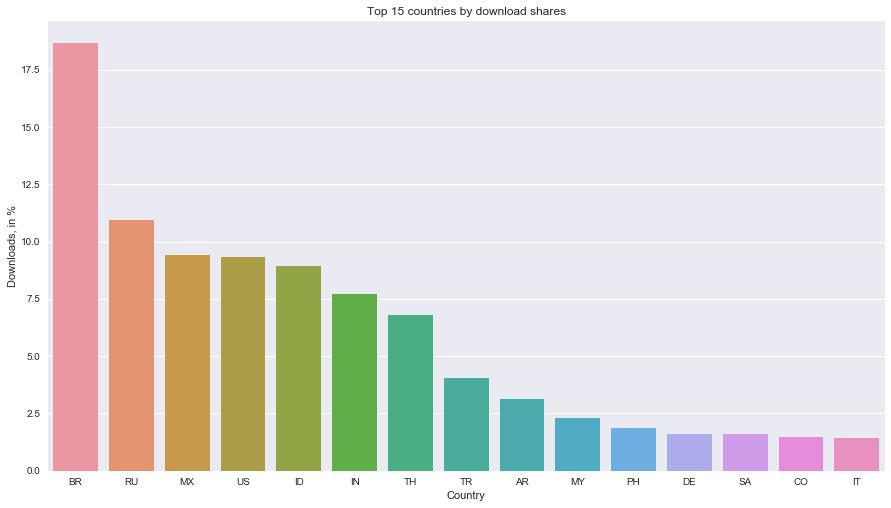

In [16]:
g = sns.barplot(country_count.index[:15], country_count[:15] * 100 /sum(country_count))
g.set(xlabel = 'Country', ylabel = 'Downloads, in %', title = 'Top 15 countries by download shares')
plt.show()

Как можем видеть, львиная доля скачиваний приходится на Бразилию(целых 18% от общих скачиваний), остальные страны сильно отстают. Однако дальше идет Россия, с долей в 11%, Мексика и США имеют практически одинаковые доли (почти 10%).

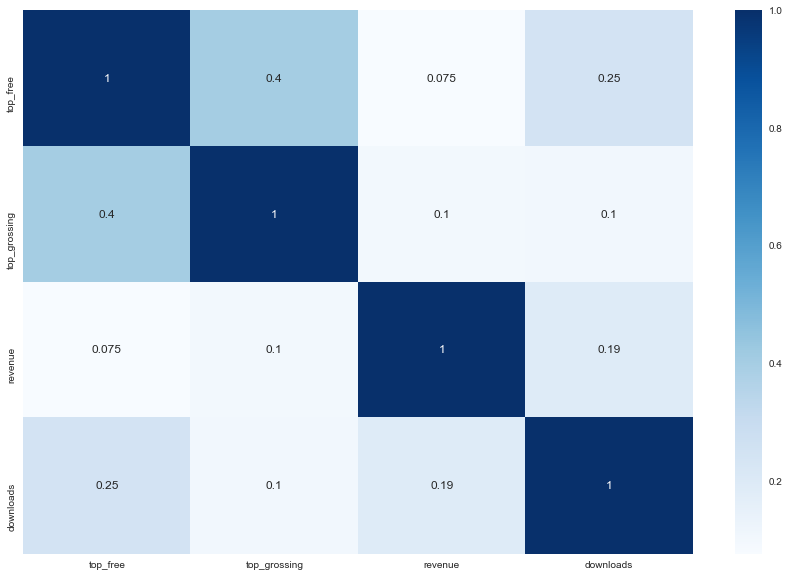

In [17]:
sns.set(rc={'figure.figsize': (15, 10)})
for_correlation = df1.loc[:, ['top_free', 'top_grossing', 'revenue', 'downloads']]
for_correlation.top_free = for_correlation.top_free* (-1)
for_correlation.top_grossing = for_correlation.top_grossing* (-1)
correlation = for_correlation.corr()
sns.heatmap(correlation, annot = True,cmap="Blues")

Видим значительную корреляцию между "кассовостью" и местом в топе бесплатных приложений(0.4). Это может объясняться тем, что чем выше в топе приложение, тем пользователи охотнее вкладывают деньги. Также видим корреляцию между скачиваниями и местом(top_free). Однако корреляция не настолько большая, как хотелось бы. Возможно, это связано с тем, что сама по себе метрика top_free - не количественная, а порядковая. Что также объясняет низкую корреляцию между revenue и top_free, но высокую между top_grossing(тоже порядковая) и top_free.
Интересно посмотреть, какое приложение приносит наибольшую выручку и наибольшее количество скачиваний.

In [18]:
import plotly.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode(connected=True)

grouped = df1.groupby(['store_application_id'])['revenue', 'downloads'].sum()
grouped['rev_down'] = grouped['revenue']* 100/grouped['downloads']




trace1 = go.Bar(
    x=grouped.index,
    y=grouped.revenue,
    name='Revenue'
)
trace2 = go.Bar(
    x=grouped.index,
    y=grouped.downloads,
    name='Downloads'
)

trace3 = go.Bar(
    x=grouped.index,
    y=grouped.rev_down,
    name='percentage'
)

data = [trace1, trace2]
data2 = [trace3]
layout = go.Layout(
    barmode='group',
    title = 'Revenue and Downloads by Application ID'
)

layout1 = go.Layout(
    barmode='group',
    title = 'Revenue per download, %'
)

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig)
fig2 = go.Figure(data = data2, layout = layout1)
offline.iplot(fig2)

Видим, что первое приложение пользуется огромной популярностью, однако оно приносит относительно низкий доход. То же самое можно и сказать о всех приложениях, кроме третьего. Возможно, проблема в том, что магазины в приложении недостаточно продуманы(или их вообще нет, кроме возможности отключения рекламы), и люди не находят смысл платить за платный контент. Третье же приложение приносит огромный доход за скачивание(целых 26 процентов). Хотя третье приложение и не пользуется такой популярностью, как первое, люди готовы платить за дополнительные услуги,что может говорить о планах использования приложения в долгосрочной перспективе(Согласно статье _Arkes and Blumer "The psychology of sunk cost"_, чем больше люди денег вкладывают люди в какой-либо объект, тем тяжелее им отказаться от его использования).

Соответственно, давайте посмотрим на динамику во времени третьего приложения в США, т.к. с точки зрения метрик оно выглядит самым привлекательным.

In [19]:
subset = df1[(df1['country'] == 'US') & (df1['store_application_id'] == 3)]

In [20]:
print(subset.shape)
subset.reset_index(inplace=True)

(2061, 8)


Давайте проверим количество уникальных значений в полученных данных и посмотрим, есть ли пропущенные значения

In [21]:
subset.nunique()

index                   2061
country                    1
store_application_id       1
date                    1438
top_free                1160
top_grossing             403
revenue                 1595
downloads               1624
created_at              2058
dtype: int64

In [22]:
subset.isna().sum()

index                   0
country                 0
store_application_id    0
date                    0
top_free                3
top_grossing            1
revenue                 1
downloads               3
created_at              0
dtype: int64

Необходимо заметить, что пропущенных значений всего 8, также количество дат меньше размерности датасета, необходимо выяснить причину.

In [23]:
print(subset.groupby(['date']).agg({
    'revenue': ['mean', 'std'],
    'downloads': ['mean', 'std']
}).apply(lambda x: x.count(), axis=0))


subset.groupby(['date']).agg({
    'revenue': ['mean', 'std', 'count'],
    'downloads': ['mean', 'std', 'count']
}).head()


revenue    mean    1437
           std      623
downloads  mean    1436
           std      622
dtype: int64


revenue                   downloads                  
               mean         std count      mean         std count
date                                                             
2015-01-01  1635.30  301.651753     2   2956.65  545.391460     2
2015-01-02  1728.45  318.834448     2   2856.60  526.935973     2
2015-01-03  1799.75  331.986634     2   3137.20  578.696190     2
2015-01-04  1804.35  332.835162     2   3126.85  576.787001     2
2015-01-05  1780.20  328.380389     2   2802.55  516.965768     2

Как мы видим, чуть менее половины значений неуникальны. 

In [24]:

subset.groupby(['date']).agg({
    'revenue': ['mean', 'std', 'count'],
    'downloads': ['mean', 'std', 'count']
}).tail()


revenue           downloads          
              mean std count      mean std count
date                                            
2018-12-04  3158.0 NaN     1    2803.0 NaN     1
2018-12-05  3293.0 NaN     1    2827.0 NaN     1
2018-12-06  3231.0 NaN     1    2330.0 NaN     1
2018-12-07  2940.0 NaN     1    2167.0 NaN     1
2018-12-08  2897.0 NaN     1    2116.0 NaN     1

In [25]:
subset[(subset['date'] == '2015-01-05')]

,index,country,store_application_id,date,top_free,top_grossing,revenue,downloads,created_at
26,15050,US,3,2015-01-05,1275.0,345.0,1548.0,2437.0,2018-12-07 07:39:38
1464,270438,US,3,2015-01-05,1275.0,345.0,2012.4,3168.1,2018-12-05 07:39:38


In [26]:
subset[(subset['date'] == '2015-01-01')]

,index,country,store_application_id,date,top_free,top_grossing,revenue,downloads,created_at
22,15046,US,3,2015-01-01,1380.0,381.0,1422.0,2571.0,2018-12-07 07:28:59
1460,270434,US,3,2015-01-01,1380.0,381.0,1848.6,3342.3,2018-12-05 07:28:59


In [27]:
print('Mean differences in revenue and downloads respectively are {}, {}'.format(subset.sort_values(by = ['date', 'created_at'], ascending = [True, True]).groupby(['date'])['revenue'].diff().mean()
,subset.sort_values(by = ['date', 'created_at'], ascending = [True, True]).groupby(['date'])['downloads'].diff().mean()))

Mean differences in revenue and downloads respectively are -564.1146067415729, -508.74163987138263


Как можно заметить, в данных присутствуют несколько наблюдений для многих дат(примерно половина дат имеют по 2 записи, причем более ранние наблюдения(2015 год)). Их разница лишь в дате создания записи(на 2 дня позже) и разнице в revenue и downloads. Стоит заметить, что при более позднем создании записи, ключевые метрики, упомянутые выше, проседают в среднем на *564.11* для revenue и *508.74* для downloads. При этом коррелированные метрики(top_grossing для revenue, top_free для downloads, не изменяются). Возможно, данные наблюдения каким-либо образом связаны с предсказаниями модели. 

In [28]:
subset.sort_values(by = ['date', 'created_at'], ascending = [True, True]).head(10)

,index,country,store_application_id,date,top_free,top_grossing,revenue,downloads,created_at
1460,270434,US,3,2015-01-01,1380.0,381.0,1848.6,3342.3,2018-12-05 07:28:59
22,15046,US,3,2015-01-01,1380.0,381.0,1422.0,2571.0,2018-12-07 07:28:59
1461,270435,US,3,2015-01-02,1394.0,372.0,1953.9,3229.2,2018-12-05 07:31:37
23,15047,US,3,2015-01-02,1394.0,372.0,1503.0,2484.0,2018-12-07 07:31:37
1462,270436,US,3,2015-01-03,1311.0,358.0,2034.5,3546.4,2018-12-05 07:34:13
24,15048,US,3,2015-01-03,1311.0,358.0,1565.0,2728.0,2018-12-07 07:34:13
1463,270437,US,3,2015-01-04,1261.0,353.0,2039.7,3534.7,2018-12-05 07:36:52
25,15049,US,3,2015-01-04,1261.0,353.0,1569.0,2719.0,2018-12-07 07:36:52
1464,270438,US,3,2015-01-05,1275.0,345.0,2012.4,3168.1,2018-12-05 07:39:38
26,15050,US,3,2015-01-05,1275.0,345.0,1548.0,2437.0,2018-12-07 07:39:38


In [29]:
subset.created_at = pd.to_datetime(subset.created_at)
subset['created_at_formatted'] = subset.created_at.map(lambda x: x.strftime('%Y-%m-%d'))
subset.created_at_formatted.unique()

C:\Users\zhav1k\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\zhav1k\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



array(['2018-12-06', '2018-12-05', '2018-12-07', '2018-12-08',
       '2018-12-09', '2018-12-04', '2018-12-03'], dtype=object)

In [30]:
subset['created_at_formatted'].value_counts()

2018-12-06    654
2018-12-05    645
2018-12-07    286
2018-12-04    260
2018-12-03    214
2018-12-08      1
2018-12-09      1
Name: created_at_formatted, dtype: int64

В основном данные парсились за 5 дней.

In [31]:
subset1 = subset.loc[:, ['date', 'downloads', 'top_free', 'top_grossing', 'revenue']]
subset1 = subset1.groupby(['date'])['downloads', 'top_free', 'top_grossing', 'revenue'].mean()
#subset1.set_index('date').plot()

In [32]:
downloads = go.Scatter(x=subset1.index, y=subset1.downloads, name = 'downloads')
free = go.Scatter(x=subset1.index, y=subset1.top_free, name = 'top_free')
grossing = go.Scatter(x=subset1.index, y=subset1.top_grossing, name = 'top_grossing')
revenue = go.Scatter(x=subset1.index, y=subset1.revenue, name = 'revenue')

data = [downloads, free, grossing, revenue]
offline.iplot({'data': data, "layout": go.Layout(title="Main metrics in time")})

На графиках можем видеть очень странные пики скачиваний в июле 2015 и июле 2016 года. Причем пик был лишь на пару дней, затем снова угасал. При этом в первом случае, приложение входило в top 100 free. Также между пиками был заметный спад в скачиваниях и проседание в рейтинге. Стоит заметить, что приложение было примерно в одном промежутке по top_grossing(между 200-700 местами). Однако после марта 2017 года все 4 ряда выглядят стационарными, нет никаких резких пиков, и, относительно периода до апреля 2017 года, доход в среднем вырос. Также по графику видно, что засчет правой части графика в приложении высокое отношение revenue/downloads. Давайте взглянем детальней на данную метрику.

In [33]:
rev_down = [go.Scatter(x=subset1.index, y=subset1.revenue * 100/subset1.downloads, name = 'revenue/downloads')]
offline.iplot({'data': rev_down, "layout": go.Layout(title="Revenue/downloads, %")})

In [34]:
print(subset1.revenue.sum()* 100/subset1.downloads.sum())

107.95717637392828


Видим, что в США данная метрика в 4 раза превышает среднюю по всем странам, что ожидаемо, т.к  Штаты являются одной из самых платящих стран в мире.

**Вопрос 3.** Работа одновременно с df_1 и df_2. Найти наиболее проблемный store_application_id – в каком приложении модель больше всего ошибается по метрикам downloads и revenue? (тут нужно быть внимательным)
Есть ли какое-то приложение, которое сильно отличается от других, либо модель ошибается приблизительно одинаково на всех приложениях? 

Для наиболее проблемного store_application_id (если модель ошибается одинаково, берите любой store_application_id) найти страну, где наблюдается наибольшая ошибка по downloads.
Эта ошибка постоянна, либо наблюдалась в определенном периоде в прошлом, и в последнее время модель точна по этой стране?




**Решение.** Допустим, что мое предположение верно, и первый датасет содержит модельные данные. Тогда давайте объединим данные и посмотрим на ошибку. В данном случае я возьму самую простую метрику для данной задачи - MSE

In [35]:
df1.nunique()

country                    40
store_application_id        5
date                     1438
top_free                36233
top_grossing            24834
revenue                  2992
downloads               10371
created_at               2156
dtype: int64

In [36]:
df2.nunique()

country                    237
store_application_id         5
date                      1437
top_free                 32823
top_grossing             23487
revenue                 128750
downloads                 5973
created_at                   0
dtype: int64

In [37]:
df = df2.merge(df1, on = ['country', 'store_application_id', 'date' ], how = 'right')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378844 entries, 0 to 378843
Data columns (total 13 columns):
country                 378844 non-null object
store_application_id    378844 non-null int64
date                    378844 non-null object
top_free_x              302610 non-null float64
top_grossing_x          216630 non-null float64
revenue_x               142292 non-null float64
downloads_x             371970 non-null float64
created_at_x            0 non-null float64
top_free_y              368220 non-null float64
top_grossing_y          268783 non-null float64
revenue_y               231605 non-null float64
downloads_y             364060 non-null float64
created_at_y            378844 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 40.5+ MB


In [87]:
import math as math

df['sq_error_downloads'] = (df.downloads_x - df.downloads_y)**2
df['sq_error_revenue'] = (df.revenue_x - df.revenue_y)**2

In [88]:
df.groupby(['store_application_id'])['sq_error_downloads', 'sq_error_revenue'].mean().sort_values(by = ['sq_error_downloads', 'sq_error_revenue'], ascending = False)

,sq_error_downloads,sq_error_revenue
store_application_id,,
3,316304.077557,13374.038026
1,148557.578741,3221.483809
4,78658.373499,769.037625
5,45272.647625,32.685403
2,18936.893493,1157.549653


Получается, самое проблемное приложение по обеим метрикам - третье. Затем идет приложение с первым id.

Найдем, в какой стране наблюдается самая большая ошибка в третьем приложении

In [89]:
df[df['store_application_id'] == 3].groupby(['country'])['sq_error_downloads'].sum().sort_values(ascending = False)

country
US    5.740521e+09
RU    4.247520e+09
BR    3.961115e+09
IN    3.857984e+09
TH    1.600738e+09
TR    1.167093e+09
MX    9.781036e+08
DE    7.977439e+08
FR    4.953014e+08
ID    3.798052e+08
SA    3.703845e+08
PH    3.245224e+08
ES    3.162690e+08
IT    3.113697e+08
EG    2.222124e+08
PL    2.097442e+08
AR    1.867679e+08
MY    1.714328e+08
CO    1.545159e+08
TW    8.861067e+07
GB    6.896991e+07
KR    6.735008e+07
JP    5.785868e+07
IL    4.238700e+07
NL    3.844483e+07
BE    2.430579e+07
AE    2.209246e+07
ZA    2.098854e+07
CA    2.065877e+07
VN    1.963505e+07
AT    1.027942e+07
SG    7.241144e+06
AU    7.081581e+06
SE    5.576767e+06
HK    3.901160e+06
CH    3.834821e+06
IE    1.821748e+06
NO    9.317450e+05
NG    9.204942e+05
DK    8.037796e+05
Name: sq_error_downloads, dtype: float64

Самая большая ошибка по скачиваниям - США.

In [107]:
data_fin = df[df['country'] == 'US'].groupby(['date'])['downloads_x', 'sq_error_downloads', 'downloads_y'].mean()

In [108]:
downloads = go.Scatter(x=data_fin.index, y=data_fin.downloads_x, name = 'Actual downloads')
prediction_error = go.Scatter(x=data_fin.index, y=data_fin.sq_error_downloads, name = 'Error')
data = [prediction_error]
offline.iplot({'data': data, "layout": go.Layout(title="Error")})

По данному графику тяжело что-либо сказать, давайте избавимся от аутлаеров.

In [109]:
data_fin.sq_error_downloads.clip(1, 5000000, inplace = True)

In [112]:
prediction_error = go.Scatter(x=data_fin.index, y=np.sqrt(data_fin.sq_error_downloads), name = 'Error')

downloads = go.Scatter(x=data_fin.index, y=data_fin.downloads_x, name = 'Actual values')
data = [prediction_error, downloads]
offline.iplot({'data': data, "layout": go.Layout(title="True against Fitted values")})

Судя по графику, алгоритм с начала февраля 2017 года начал ошибаться меньше, хотя и присутствуют определенные выбросы. Однако скорее всего, данный феномен связан с тем, что истинные значения начали колебаться меньше после января 2017 года. Поэтому алгоритму легче подстроиться под значения выборки и начать "лучше предсказывать". На самом же деле, есть алгоритму подать новые данные, которые будут более волатильны, то предсказания снова ухудшатся и ошибка вырастет. Соответственно, хотя в данном случае по графику кажется, что алгоритм стал лучше предсказывать, на самом деле это не так.